### Imports

In [1]:
import pyreadr
import pyinstrument
import pandas as pd
from tqdm.notebook import tqdm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
from datetime import datetime, timedelta

In [2]:
columns_to_keep = ["time_stamp", "bike_number", "bike", "uid", "lat", "lng", "name", "station_number"]

# Practice joins and filters

In [3]:
start_time = datetime(2024, 1, 31, 0, 3, 0)
#end_time = datetime(2024, 2, 1, 0, 00, 0)
current_time = start_time
current_filename = f'../data/Dresden_01-03.24/{current_time.strftime("%Y-%m-%d")}/{current_time.strftime("%Y-%m-%d-%H-%M-00")}.rds'
lag_time = current_time - timedelta(minutes=1)
lag_filename = f'../data/Dresden_01-03.24/{lag_time.strftime("%Y-%m-%d")}/{lag_time.strftime("%Y-%m-%d-%H-%M-00")}.rds'



In [4]:
result = pyreadr.read_r(current_filename)
df_current = result[None][columns_to_keep]


In [5]:
df_current

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number
0,2024-01-31 00:03:00,931104,False,32938439,51.056030,13.722850,MOBIpunkt Bahnhof Mitte,43001
1,2024-01-31 00:03:00,930664,False,32938697,51.057930,13.745820,MOBIpunkt Carolaplatz,43011
2,2024-01-31 00:03:00,930803,False,32938910,51.077640,13.716860,MOBIpunkt Altpieschen,43015
3,2024-01-31 00:03:00,931397,False,32938910,51.077640,13.716860,MOBIpunkt Altpieschen,43015
4,2024-01-31 00:03:00,931637,False,32938910,51.077640,13.716860,MOBIpunkt Altpieschen,43015
...,...,...,...,...,...,...,...,...
1163,2024-01-31 00:03:00,931202,True,353337278,51.078742,13.706899,NaN,NaN
1164,2024-01-31 00:03:00,931640,True,353337283,51.042791,13.736009,NaN,NaN
1165,2024-01-31 00:03:00,930086,True,353337316,51.047289,13.750616,NaN,NaN
1166,2024-01-31 00:03:00,930489,True,353337320,51.084796,13.727681,NaN,NaN


In [6]:
result = pyreadr.read_r(lag_filename)
df_lag = result[None]

In [7]:
df_lag

,city,time_stamp,uid,lat,lng,bike,name,station_number,booked_bikes,bikes,bikes_available_to_rent,bike_racks,free_racks,maintenance,terminal_type,place_type,rack_locks,no_registration,bike_number,bike_type,lock_types,active,state,electric_lock,boardcomputer
0,Dresden,2024-01-31 00:02:00,32938439,51.056030,13.722850,False,MOBIpunkt Bahnhof Mitte,43001,0,1,1,6,5,False,NaN,18,False,False,931104,150,"frame_lock,dls",True,ok,True,7.551063e+09
1,Dresden,2024-01-31 00:02:00,32938697,51.057930,13.745820,False,MOBIpunkt Carolaplatz,43011,0,1,1,5,4,False,NaN,18,False,False,930664,150,"frame_lock,dls",True,ok,True,7.551063e+09
2,Dresden,2024-01-31 00:02:00,32938910,51.077640,13.716860,False,MOBIpunkt Altpieschen,43015,0,4,4,6,2,False,NaN,18,False,False,930803,196,"frame_lock,dls",True,ok,True,7.551171e+09
3,Dresden,2024-01-31 00:02:00,32938910,51.077640,13.716860,False,MOBIpunkt Altpieschen,43015,0,4,4,6,2,False,NaN,18,False,False,931432,196,"frame_lock,dls",True,ok,True,7.551132e+09
4,Dresden,2024-01-31 00:02:00,32938910,51.077640,13.716860,False,MOBIpunkt Altpieschen,43015,0,4,4,6,2,False,NaN,18,False,False,931397,196,"frame_lock,dls",True,ok,True,7.551134e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Dresden,2024-01-31 00:02:00,353337002,51.051480,13.741164,True,NaN,NaN,0,1,1,NaN,0,False,NaN,12,False,False,930530,150,"frame_lock,dls",True,ok,True,7.551063e+09
1166,Dresden,2024-01-31 00:02:00,353337012,51.076782,13.724803,True,NaN,NaN,0,1,1,NaN,0,False,NaN,12,False,False,931357,196,"frame_lock,dls",True,ok,True,7.551135e+09
1167,Dresden,2024-01-31 00:02:00,353337042,51.047329,13.750641,True,NaN,NaN,0,1,1,NaN,0,False,NaN,12,False,False,930086,196,"frame_lock,dls",True,ok,True,7.551160e+09
1168,Dresden,2024-01-31 00:02:00,353337062,51.084853,13.727458,True,NaN,NaN,0,1,1,NaN,0,False,NaN,12,False,False,930489,150,"frame_lock,dls",True,ok,True,7.551135e+09


df_merge = df_current[columns_to_keep].merge(df_lag[columns_to_keep], 
                                             on="bike_number", how="outer", 
                                             suffixes=("_current", "_lag"), validate="one_to_one", indicator=True)

df_merge.columns

df_merge[df_merge._merge!="both"]

In [8]:
df_lag[~df_lag.bike_number.isin(df_current.bike_number)][columns_to_keep]

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number
3,2024-01-31 00:02:00,931432,False,32938910,51.077640,13.716860,MOBIpunkt Altpieschen,43015
161,2024-01-31 00:02:00,931334,False,45741034,51.072482,13.746493,S-Bf. Bischofsplatz (Hecht),43072
1144,2024-01-31 00:02:00,930470,True,353336303,51.037369,13.749184,NaN,NaN


In [9]:
to_add_rent = df_lag[~df_lag.bike_number.isin(df_current.bike_number)][columns_to_keep]
to_add_rent

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number
3,2024-01-31 00:02:00,931432,False,32938910,51.077640,13.716860,MOBIpunkt Altpieschen,43015
161,2024-01-31 00:02:00,931334,False,45741034,51.072482,13.746493,S-Bf. Bischofsplatz (Hecht),43072
1144,2024-01-31 00:02:00,930470,True,353336303,51.037369,13.749184,NaN,NaN


In [10]:
to_add_rent = df_lag[~df_lag.bike_number.isin(df_current.bike_number.tolist())][columns_to_keep]
to_add_rent["rent_or_return"] = "rent"


In [11]:
df = pd.DataFrame()

In [12]:
df = pd.concat([df, to_add_rent], ignore_index=True)

In [13]:
df

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number,rent_or_return
0,2024-01-31 00:02:00,931432,False,32938910,51.077640,13.716860,MOBIpunkt Altpieschen,43015,rent
1,2024-01-31 00:02:00,931334,False,45741034,51.072482,13.746493,S-Bf. Bischofsplatz (Hecht),43072,rent
2,2024-01-31 00:02:00,930470,True,353336303,51.037369,13.749184,NaN,NaN,rent


In [14]:
to_add_rent

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number,rent_or_return
3,2024-01-31 00:02:00,931432,False,32938910,51.077640,13.716860,MOBIpunkt Altpieschen,43015,rent
161,2024-01-31 00:02:00,931334,False,45741034,51.072482,13.746493,S-Bf. Bischofsplatz (Hecht),43072,rent
1144,2024-01-31 00:02:00,930470,True,353336303,51.037369,13.749184,NaN,NaN,rent


In [15]:
df_current[~df_current.bike_number.isin(df_lag.bike_number)][columns_to_keep]

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number
68,2024-01-31 00:03:00,931033,False,32940489,51.05986,13.71834,MOBIpunkt Friedrichstadt,43024


# Iterate over datasets to create df of rents and returns

In [16]:
def get_filename(time):
    return f'../data/Dresden_01-03.24/{time.strftime("%Y-%m-%d")}/{time.strftime("%Y-%m-%d-%H-%M-00")}.rds'


In [ ]:
rent_list = []
return_list = []

In [19]:
start_time = datetime(2024, 3, 27, 14, 52, 0) # the second filename
end_time = datetime(2024, 3, 31, 23, 59, 0) # the very last filename


lag_time = start_time - timedelta(minutes=1)
lag_filename = get_filename(lag_time)
df_lag = pyreadr.read_r(lag_filename)[None][columns_to_keep]
lag_bike_numbers = set(df_lag.bike_number)

for current_time in tqdm(pd.date_range(start=start_time, end=end_time, freq="min")):
        current_filename = get_filename(current_time)
        try:
                df_current = pyreadr.read_r(current_filename)[None][columns_to_keep]
                current_bike_numbers = set(df_current.bike_number)

                rented_bikes = df_lag[df_lag.bike_number.isin(lag_bike_numbers-current_bike_numbers)]
                if not rented_bikes.empty:
                        rent_list.extend(rented_bikes.to_dict(orient="records"))

                returned_bikes = df_current[df_current.bike_number.isin(current_bike_numbers-lag_bike_numbers)]
                if not returned_bikes.empty:
                        return_list.extend(returned_bikes.to_dict(orient="records"))
                
                df_lag = df_current
                lag_bike_numbers = current_bike_numbers
        except Exception as e:
                pass


        



  0%|          | 0/6308 [00:00<?, ?it/s]

In [18]:
current_time # Timestamp('2024-03-15 06:17:00')

Timestamp('2024-03-27 14:52:00')

In [20]:
df = pd.DataFrame(rent_list)

In [21]:
df['rent_or_return']="rent"

In [22]:
df_return = pd.DataFrame(return_list)

In [23]:
df_return['rent_or_return']="return"

In [24]:
df = pd.concat([df,df_return], ignore_index=True)

In [25]:
df = df.sort_values(["bike_number", "time_stamp"])

In [30]:
df.time_stamp.max()

'2024-03-31 23:59:00'

In [37]:
df.dtypes

time_stamp         object
bike_number         int64
bike                 bool
uid                 int64
lat               float64
lng               float64
name               object
station_number    float64
rent_or_return     object
dtype: object

In [41]:
df.time_stamp.min()

'2024-01-01 00:02:00'

In [45]:
df.time_stamp.apply(len).unique()

array([19, 10])

In [61]:
df.time_stamp = df.time_stamp.apply(lambda x: x + " 00:00:00" if len(x) == 10 else x)

In [65]:
df["date"]=pd.to_datetime(df.time_stamp).dt.date

In [ ]:
df.to_pickle("../data/rents_returns_by_bike_Dresden_01-03.24.pkl")

# Explore anomalies

In [ ]:
import matplotlib.pyplot as plt

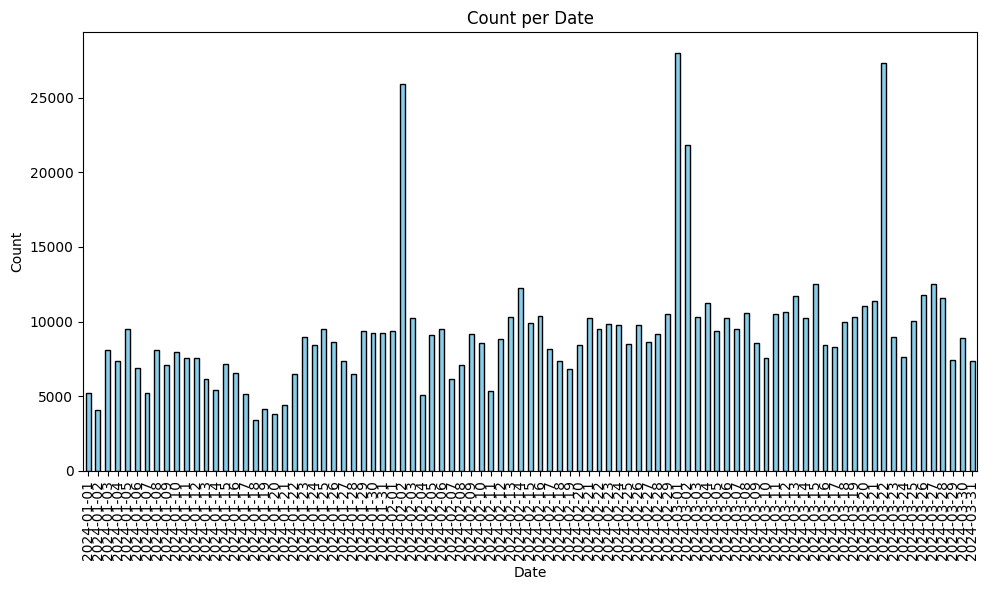

In [75]:
date_counts = df.groupby("date").size()

plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count per Date')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

In [82]:
len(df.bike_number.unique())

1860

In [86]:
datetime_counts = df.groupby("time_stamp").size()
datetime_counts = datetime_counts.sort_values(ascending=False)

In [87]:
datetime_counts.head(10)

time_stamp
2024-02-14 00:40:00    182
2024-02-14 00:27:00    174
2024-02-14 08:00:00    172
2024-02-14 08:02:00    149
2024-02-14 00:14:00    148
2024-02-13 23:36:00    124
2024-02-14 01:20:00    110
2024-02-14 08:01:00    110
2024-02-14 01:07:00    101
2024-02-14 08:08:00     89
dtype: int64

In [83]:
len(df)-len(df.drop_duplicates())

0

In [88]:
date_counts = df.groupby("date").size()
date_counts = date_counts.sort_values(ascending=False)
date_counts.head(10)

date
2024-03-01    28000
2024-03-22    27324
2024-02-02    25955
2024-03-02    21845
2024-03-27    12534
2024-03-15    12512
2024-02-14    12224
2024-03-26    11803
2024-03-13    11706
2024-03-28    11607
dtype: int64

In [74]:
df

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number,rent_or_return,date
481181,2024-01-19 08:43:00,930000,False,32939517,51.048930,13.744200,MOBIpunkt Pirnaischer Platz,43003.0,return,2024-01-19
64361,2024-01-21 15:39:00,930000,False,32939517,51.048930,13.744200,MOBIpunkt Pirnaischer Platz,43003.0,rent,2024-01-21
486104,2024-01-21 15:46:00,930000,False,32939517,51.048930,13.744200,MOBIpunkt Pirnaischer Platz,43003.0,return,2024-01-21
64421,2024-01-21 15:50:00,930000,False,32939517,51.048930,13.744200,MOBIpunkt Pirnaischer Platz,43003.0,rent,2024-01-21
486217,2024-01-21 16:09:00,930000,True,348898836,51.033422,13.707902,NaN,NaN,return,2024-01-21
...,...,...,...,...,...,...,...,...,...,...
830000,2024-03-28 17:02:00,932013,False,382962921,48.134627,11.610754,Mentz Büro,32432.0,return,2024-03-28
407930,2024-03-28 17:34:00,932013,False,382962921,48.134627,11.610754,Mentz Büro,32432.0,rent,2024-03-28
830216,2024-03-28 17:39:00,932013,False,382962921,48.134627,11.610754,Mentz Büro,32432.0,return,2024-03-28
408412,2024-03-28 18:42:00,932013,False,382962921,48.134627,11.610754,Mentz Büro,32432.0,rent,2024-03-28


# dataset checks

In [ ]:
df[df.bike_number==931492]

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number,rent_or_return
79,2024-01-31 01:56:00,931492,False,55466724,51.029253,13.730582,Hörsaalzentrum TU Dresden,43116.0,rent


In [ ]:
df[df.bike_number==931492]

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number,rent_or_return
79,2024-01-31 01:56:00,931492,False,55466724,51.029253,13.730582,Hörsaalzentrum TU Dresden,43116.0,rent


In [ ]:
df[df.bike_number==930494]  

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number,rent_or_return
78,2024-01-31 01:47:00,930494,True,353304968,51.070476,13.747492,NaN,NaN,rent
166,2024-01-31 01:57:00,930494,True,353375953,51.057511,13.724396,NaN,NaN,return


In [ ]:
df[df.bike_number==930494]

,time_stamp,bike_number,bike,uid,lat,lng,name,station_number,rent_or_return
78,2024-01-31 01:47:00,930494,True,353304968,51.070476,13.747492,NaN,NaN,rent
166,2024-01-31 01:57:00,930494,True,353375953,51.057511,13.724396,NaN,NaN,return
